分類木、回帰木

In [18]:
import pandas as pd
carseats=pd.read_csv('./Carseats.csv')

In [19]:
#carseats.head()
carseats['High']=carseats.Sales.map(lambda x: 'Y' if x>8 else 'N') 
carseats.ShelveLoc=pd.factorize(carseats.ShelveLoc)[0]
carseats.Urban=carseats.Urban.map({'No':0, 'Yes':1})
carseats.US=carseats.US.map({'No':0, 'Yes':1})
#carseats.head()
#carseats.info()

In [20]:
X=carseats.drop(['Sales', 'High'], axis=1)
y=carseats.High

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=200)

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=4)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.865

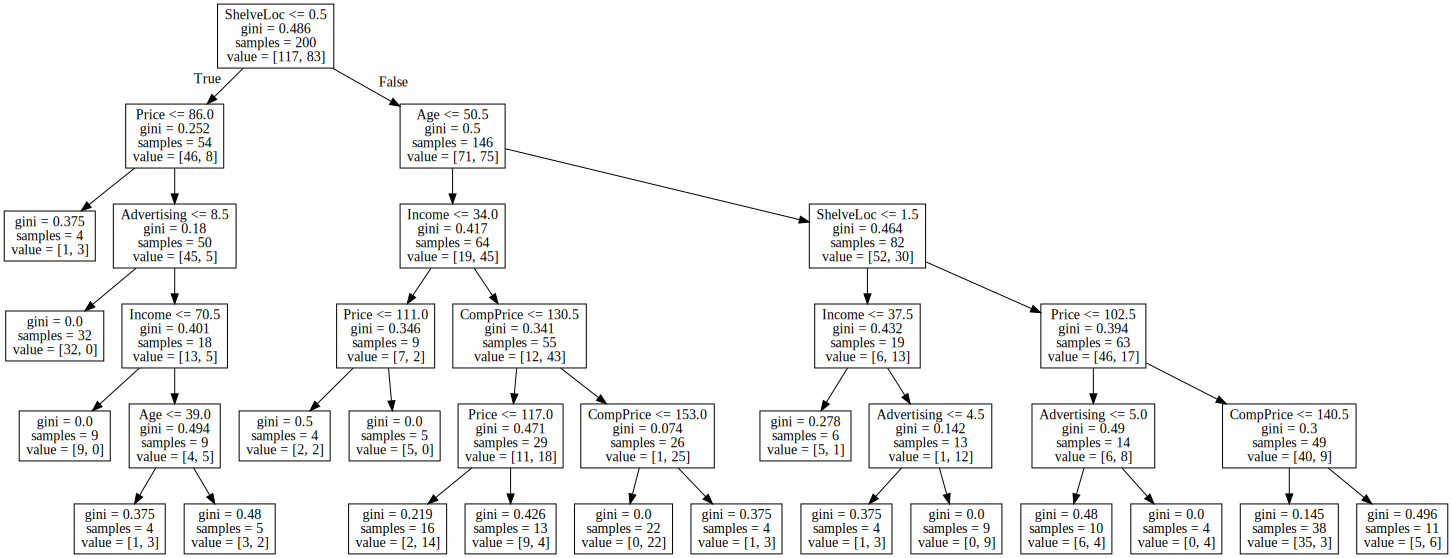

In [33]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="mytree.dot", feature_names=X_train.columns)
with open("mytree.dot") as f:
    dot_graph=f.read()
import graphviz
graphviz.Source(dot_graph)

In [34]:
y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm=pd.DataFrame(confusion_matrix(y_test, y_pred).T,
                index=['No', 'Yes'], columns=['No', 'Yes'])
cm

,No,Yes
No,83,23
Yes,36,58


In [35]:
accuracy_score(y_test, y_pred)*100

70.5

In [36]:
from sklearn.datasets import load_boston
b=load_boston()
boston = pd.DataFrame(b.data, columns=b.feature_names)
#boston.head()
#boston.shape

In [37]:
X=boston
y=b.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
train_size=0.5, random_state=0)
from sklearn.tree import DecisionTreeRegressor
regr_tree = DecisionTreeRegressor(max_depth=2)
regr_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

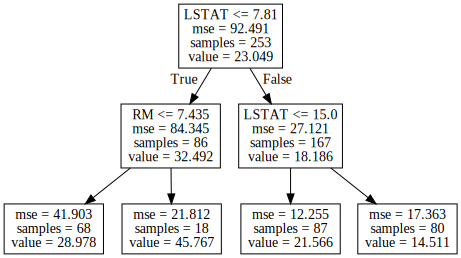

In [38]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(regr_tree, out_file = "mytree.dot",feature_names = X_train.columns)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [39]:
y_pred = regr_tree.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

28.801544864457945